In [72]:
%matplotlib notebook
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy as sp
import IPython
from IPython.display import display
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from yellowbrick.features import Rank2D
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
import pickle
from yellowbrick.classifier import ClassificationReport
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import multiprocessing
from multiprocessing import Process
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
df=pd.read_csv('/Users/mariamatsira/Documents/Capstone/stock_price_until_2019_04_28.csv', nrows = 1000) #Replace it with your path where the data file is stored
df.head()

,sno,date_of_transaction,High,Low,Open,Close,Volume,AdjClose,Symbol,Year,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,0,2011-01-03,23.169542,22.920046,23.169542,22.944036,19050200.0,17.435612,ABT,2011,...,3,0,3,False,False,False,False,False,False,1294012800
1,1,2011-01-04,23.183935,22.934441,23.049591,23.159946,18826300.0,17.599686,ABT,2011,...,4,1,4,False,False,False,False,False,False,1294099200
2,2,2011-01-05,23.423836,23.063986,23.135956,23.159946,28342600.0,17.599686,ABT,2011,...,5,2,5,False,False,False,False,False,False,1294185600
3,3,2011-01-06,23.327875,22.924845,23.270300,23.111965,32471000.0,17.563225,ABT,2011,...,6,3,6,False,False,False,False,False,False,1294272000
4,4,2011-01-07,23.246309,23.044794,23.097572,23.207926,21604400.0,17.636143,ABT,2011,...,7,4,7,False,False,False,False,False,False,1294358400


In [74]:
df.describe()

,sno,High,Low,Open,Close,Volume,AdjClose,Year,Month,Week,Day,Dayofweek,Dayofyear,Elapsed
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,499.500000,32.958410,32.490981,32.717662,32.734020,1.162309e+07,28.428710,2012.492000,6.503000,26.470000,15.637000,2.026000,182.418000,1.356609e+09
std,288.819436,6.424981,6.325843,6.365981,6.368795,7.676685e+06,6.757455,1.116774,3.412277,14.869842,8.711436,1.402602,104.101462,3.627613e+07
min,0.000000,21.806910,21.624586,21.677364,21.667768,2.207600e+06,16.787548,2011.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.294013e+09
25%,249.750000,26.478963,26.225868,26.324227,26.375805,6.243550e+06,21.901721,2011.000000,4.000000,14.000000,8.000000,1.000000,92.750000,1.325095e+09
50%,499.500000,33.419035,32.929539,33.171684,33.193680,1.028250e+07,29.026583,2012.000000,7.000000,26.000000,15.000000,2.000000,182.000000,1.356610e+09
75%,749.250000,38.150002,37.562501,37.892500,37.855000,1.466482e+07,33.835063,2013.000000,9.000000,39.000000,23.000000,3.000000,272.250000,1.387886e+09
max,999.000000,46.500000,45.910000,45.930000,46.369999,7.810830e+07,42.312401,2014.000000,12.000000,52.000000,31.000000,4.000000,366.000000,1.419206e+09


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
sno                    1000 non-null int64
date_of_transaction    1000 non-null object
High                   1000 non-null float64
Low                    1000 non-null float64
Open                   1000 non-null float64
Close                  1000 non-null float64
Volume                 1000 non-null float64
AdjClose               1000 non-null float64
Symbol                 1000 non-null object
Year                   1000 non-null int64
Month                  1000 non-null int64
Week                   1000 non-null int64
Day                    1000 non-null int64
Dayofweek              1000 non-null int64
Dayofyear              1000 non-null int64
Is_month_end           1000 non-null bool
Is_month_start         1000 non-null bool
Is_quarter_end         1000 non-null bool
Is_quarter_start       1000 non-null bool
Is_year_end            1000 non-null bool
Is_year_start          10

In [87]:
#df.set_index('sno', inplace = True)
df.head()

,date_of_transaction,High,Low,Open,Close,Volume,AdjClose
sno,,,,,,,
0,2011-01-03,23.169542,22.920046,23.169542,22.944036,19050200.0,17.435612
1,2011-01-04,23.183935,22.934441,23.049591,23.159946,18826300.0,17.599686
2,2011-01-05,23.423836,23.063986,23.135956,23.159946,28342600.0,17.599686
3,2011-01-06,23.327875,22.924845,23.270300,23.111965,32471000.0,17.563225
4,2011-01-07,23.246309,23.044794,23.097572,23.207926,21604400.0,17.636143


In [76]:
df.drop(columns=['Symbol', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Elapsed'], inplace = True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
sno                    1000 non-null int64
date_of_transaction    1000 non-null object
High                   1000 non-null float64
Low                    1000 non-null float64
Open                   1000 non-null float64
Close                  1000 non-null float64
Volume                 1000 non-null float64
AdjClose               1000 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 62.6+ KB


In [78]:
X = df.drop(columns = ['Close', 'date_of_transaction'])
y = df['Close']

In [79]:
df.head()

,sno,date_of_transaction,High,Low,Open,Close,Volume,AdjClose
0,0,2011-01-03,23.169542,22.920046,23.169542,22.944036,19050200.0,17.435612
1,1,2011-01-04,23.183935,22.934441,23.049591,23.159946,18826300.0,17.599686
2,2,2011-01-05,23.423836,23.063986,23.135956,23.159946,28342600.0,17.599686
3,3,2011-01-06,23.327875,22.924845,23.270300,23.111965,32471000.0,17.563225
4,4,2011-01-07,23.246309,23.044794,23.097572,23.207926,21604400.0,17.636143


In [89]:
df[features].corr()

,High,Low,Open,Close,Volume,AdjClose
High,1.000000,0.999373,0.999434,0.999464,-0.622042,0.998738
Low,0.999373,1.000000,0.999472,0.999459,-0.633403,0.998576
Open,0.999434,0.999472,1.000000,0.998800,-0.626905,0.998124
Close,0.999464,0.999459,0.998800,1.000000,-0.627839,0.999091
Volume,-0.622042,-0.633403,-0.626905,-0.627839,1.000000,-0.625729
AdjClose,0.998738,0.998576,0.998124,0.999091,-0.625729,1.000000


<IPython.core.display.Javascript object>


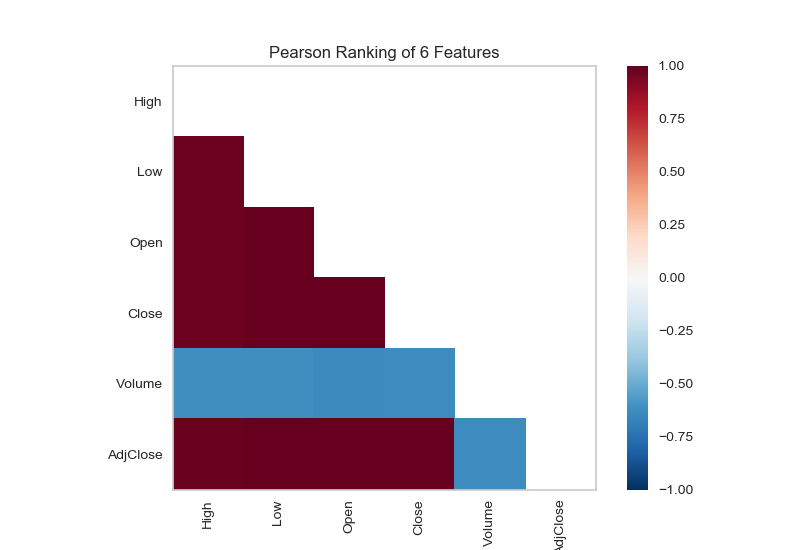

In [88]:
features = df.drop('date_of_transaction',axis=1).keys()
visualizer = Rank2D(features=features, algorithm='pearson')

visualizer.fit(X.values)                
visualizer.transform(X.values)             
visualizer.poof()

In [81]:
cols2 = pd.DataFrame(X)
cols2 = list(cols2.columns)
cols2

['sno', 'High', 'Low', 'Open', 'Volume', 'AdjClose']

<IPython.core.display.Javascript object>


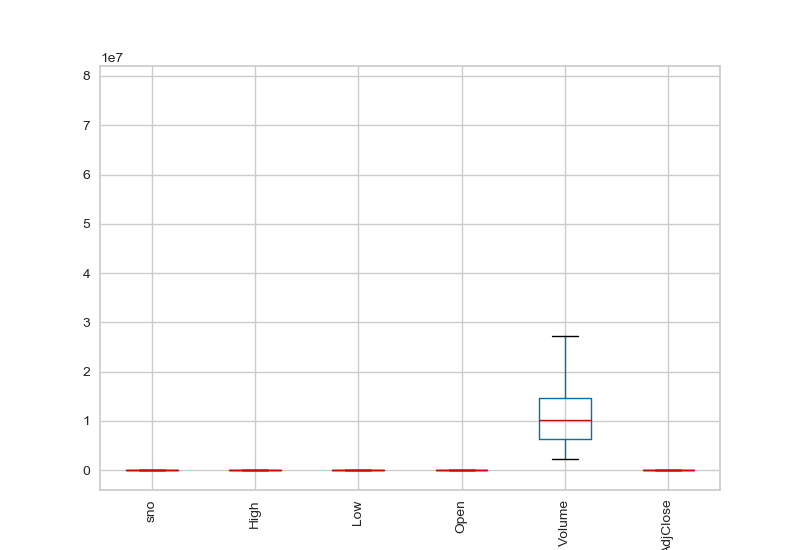

In [82]:
cols2 = pd.DataFrame(X)
cols2 = list(cols2.columns)

boxplot = X.boxplot(column=cols2, rot=90, fontsize=10)

/Users/mariamatsira/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


<IPython.core.display.Javascript object>


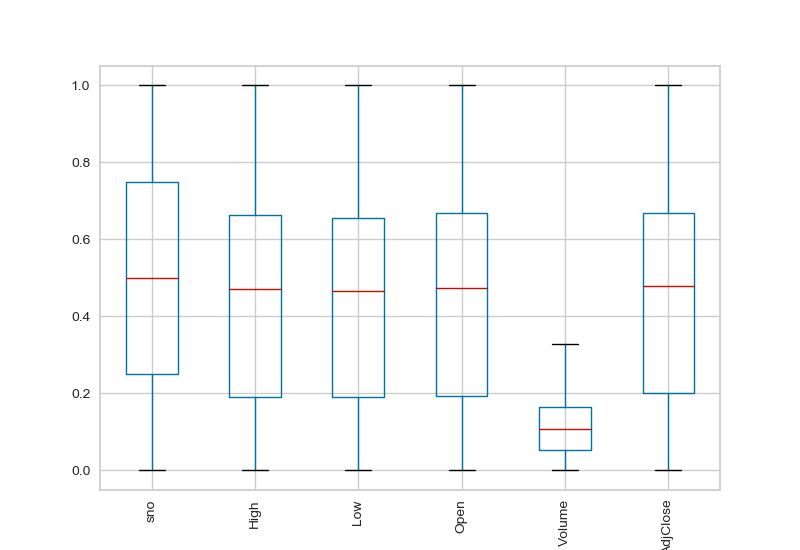

In [83]:
minmax_scaler =  MinMaxScaler(feature_range=(0, 1)) 
X_minmax = minmax_scaler.fit(X).transform(X)
X_minmax = pd.DataFrame(X_minmax)
X_minmax.columns = X.columns
cols2 = pd.DataFrame(X_minmax)
cols2 = list(cols2.columns)
boxplot = X_minmax.boxplot(column=cols2, rot=90, fontsize=10)

/Users/mariamatsira/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/mariamatsira/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


<IPython.core.display.Javascript object>


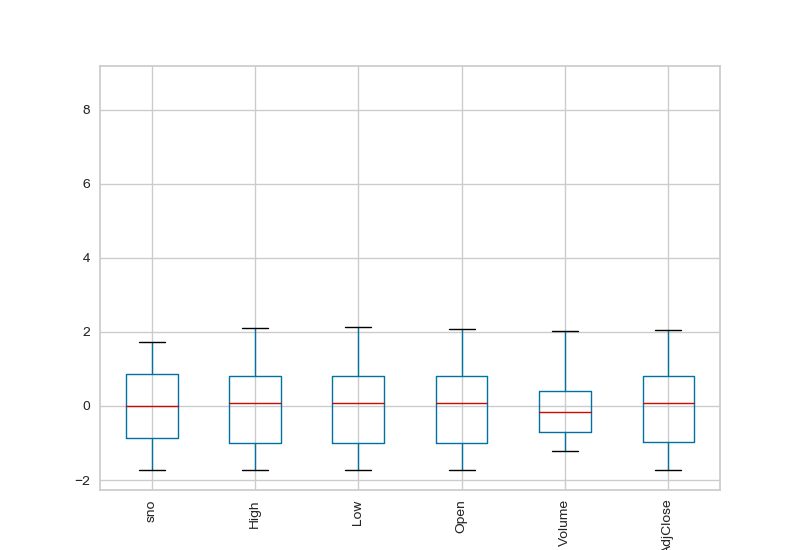

In [84]:
scaler =  StandardScaler() 
X_std = scaler.fit(X).transform(X)
X_std = pd.DataFrame(X_std)
X_std.columns = X.columns
cols2 = pd.DataFrame(X_std)
cols2 = list(cols2.columns)



boxplot = X_std.boxplot(column=cols2, rot=90, fontsize=10)

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=100):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
while dropped:
    dropped=False
    c = X[cols[variables]].values
    vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
        variables = np.delete(variables, maxloc)
        dropped=True

print('Remaining variables:')
print(X.columns[variables])

return X[cols[variables]]

IndentationError: unexpected indent (<ipython-input-70-7672e0d40e30>, line 21)